In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
voter = pd.read_csv ('voter_updated.csv')
voter.drop(voter[voter['president_voted_for'] > 2].index, inplace = True)
voter.drop(voter[voter['party'] > 3].index, inplace = True)
voter.drop(voter[voter['ideology'] > 3].index, inplace = True)
#7015 observations after modifications

In [622]:
# print(voter.dtypes)
# col_names = list(voter)
# for col in col_names:
#         voter[col] = voter[col].astype('category',copy=False)

# print(voter.dtypes)
# voter.isnull().sum()

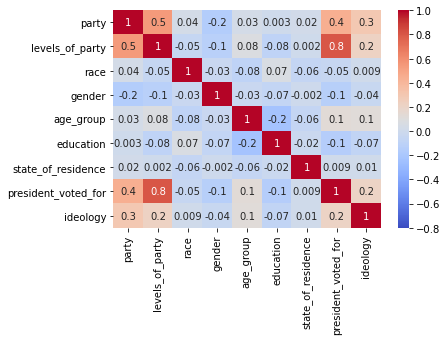

In [781]:
voter_general = voter[["party", "levels_of_party", "race", "gender", "age_group", "education", "state_of_residence", "president_voted_for", "ideology"]]
heatmap = sns.heatmap(voter_general.corr(), vmin=-.8, vmax=1, annot=True, fmt='.1g', cmap = "coolwarm", annot_kws={"size":10})
plt.savefig('./figures/1.png',  bbox_inches='tight')

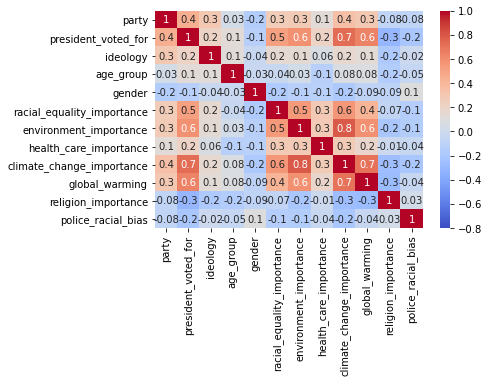

In [782]:
voter_importance_1 = voter[["party", "president_voted_for", "ideology", "age_group", "gender", "racial_equality_importance", "environment_importance", "health_care_importance", "climate_change_importance", "global_warming", "religion_importance", "police_racial_bias"]]
heatmap = sns.heatmap(voter_importance_1.corr(), vmin=-.8, vmax=1, annot=True, fmt='.1g', cmap = "coolwarm", annot_kws={"size":10})
plt.savefig('./figures/2.png',  bbox_inches='tight')

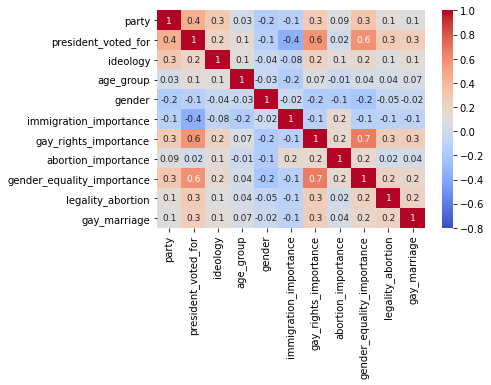

In [783]:
voter_importance_2 = voter[["party", "president_voted_for", "ideology", "age_group", "gender", "immigration_importance", "gay_rights_importance", "abortion_importance", "gender_equality_importance", "legality_abortion", "gay_marriage"]]
heatmap = sns.heatmap(voter_importance_2.corr(), vmin=-.8, vmax=1, annot=True, fmt='.1g', cmap = "coolwarm", annot_kws={"size":9})
plt.savefig('./figures/3.png',  bbox_inches='tight')

party  president_voted_for
1      1.0                    2400
       2.0                     171
2      1.0                      94
       2.0                    1990
3      1.0                     898
       2.0                    1135
dtype: int64
party  president_voted_for
1      1.0                    93.348891
       2.0                     6.651109
2      1.0                     4.510557
       2.0                    95.489443
3      1.0                    44.171176
       2.0                    55.828824
dtype: float64


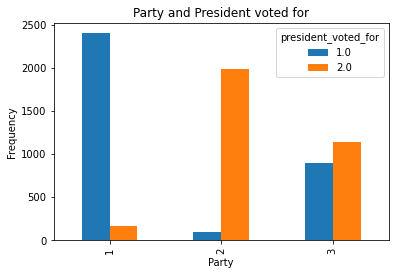

In [784]:
pd.crosstab(voter.party,voter.president_voted_for).plot(kind='bar')
plt.title('Party and President voted for')
plt.xlabel('Party')
plt.ylabel('Frequency')

count = voter.groupby(['party', 'president_voted_for']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/4.png',  bbox_inches='tight')

#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent 
#President voted for: 1 --> Hillary Clinton, 2 --> Donald Trump

ideology  president_voted_for
1.0       1.0                    1743
          2.0                      53
2.0       1.0                     175
          2.0                    2344
3.0       1.0                    1471
          2.0                     898
dtype: int64
ideology  president_voted_for
1.0       1.0                    97.048998
          2.0                     2.951002
2.0       1.0                     6.947201
          2.0                    93.052799
3.0       1.0                    62.093710
          2.0                    37.906290
dtype: float64


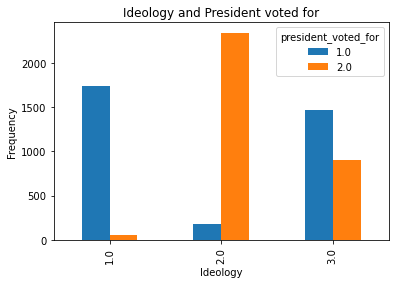

In [785]:
pd.crosstab(voter.ideology,voter.president_voted_for).plot(kind='bar')
plt.title('Ideology and President voted for')
plt.xlabel('Ideology')
plt.ylabel('Frequency')

count = voter.groupby(['ideology', 'president_voted_for']).size() 
print(count)
plt.savefig('./figures/5.png',  bbox_inches='tight')

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)

#Ideology: 1 --> Liberal, 2 --> Conservative, 3 --> Moderate 
#President voted for: 1 --> Hillary Clinton, 2 --> Donald Trump

ideology  party
1.0       1        1497
          2          22
          3         331
2.0       1         197
          2        1770
          3         679
3.0       1         994
          2         390
          3        1131
dtype: int64
ideology  party
1.0       1        80.918919
          2         1.189189
          3        17.891892
2.0       1         7.445200
          2        66.893424
          3        25.661376
3.0       1        39.522863
          2        15.506958
          3        44.970179
dtype: float64


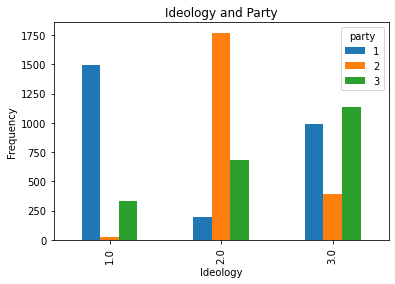

In [786]:
pd.crosstab(voter.ideology,voter.party).plot(kind='bar')
plt.title('Ideology and Party')
plt.xlabel('Ideology')
plt.ylabel('Frequency')

count = voter.groupby(['ideology', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/6.png',  bbox_inches='tight')

#Ideology: 1 --> Liberal, 2 --> Conservative, 3 --> Moderate 
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

gender  party
1       1        1073
        2        1152
        3        1238
2       1        1618
        2        1030
        3         904
dtype: int64
gender  party
1       1        30.984695
        2        33.265954
        3        35.749350
2       1        45.551802
        2        28.997748
        3        25.450450
dtype: float64


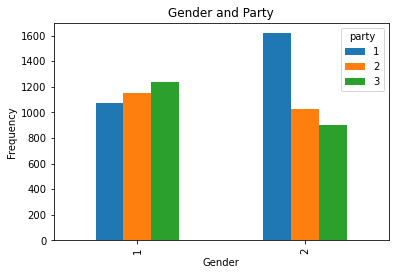

In [787]:
pd.crosstab(voter.gender,voter.party).plot(kind='bar')
plt.title('Gender and Party')
plt.xlabel('Gender')
plt.ylabel('Frequency')

count = voter.groupby(['gender', 'party']).size() 
print(count)


percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/7.png',  bbox_inches='tight')

#Gender: 1 --> Male, 2 --> Female
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

race  party
1     1        1944
      2        1952
      3        1727
2     1         463
      2          24
      3         104
3     1         140
      2         106
      3          98
4     1          50
      2          15
      3          38
5     1          16
      2          14
      3          18
6     1          51
      2          38
      3          65
7     1          24
      2          31
      3          86
8     1           3
      2           2
      3           6
dtype: int64
race  party
1     1        34.572292
      2        34.714565
      3        30.713142
2     1        78.341794
      2         4.060914
      3        17.597293
3     1        40.697674
      2        30.813953
      3        28.488372
4     1        48.543689
      2        14.563107
      3        36.893204
5     1        33.333333
      2        29.166667
      3        37.500000
6     1        33.116883
      2        24.675325
      3        42.207792
7     1        17.021277
      2 

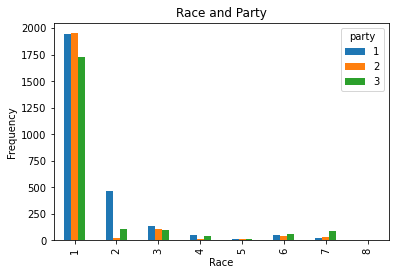

In [788]:
#Data set contained mainly white people (5623/7015 = 73%)
#Most races didn't show a pattern, only Black and Asian were mainly Democrat. Other race was mainly independent. 
#Number of observations for races other than white was small, so the conclusion might not be accurate 

pd.crosstab(voter.race,voter.party).plot(kind='bar')
plt.title('Race and Party')
plt.xlabel('Race')
plt.ylabel('Frequency')

count = voter.groupby(['race', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/8.png',  bbox_inches='tight')

#Race: 1 --> White, 2 --> Black, 3 --> Hispanic, 4 --> Asian, 5 --> Native American, 6 --> Mixed, 7 --> Other, 8 --> Middle Eastern
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

education  party
1          1         40
           2         47
           3         32
2          1        584
           2        627
           3        451
3          1        615
           2        470
           3        476
4          1        285
           2        223
           3        226
5          1        678
           2        511
           3        576
6          1        489
           2        304
           3        381
dtype: int64
education  party
1          1        33.613445
           2        39.495798
           3        26.890756
2          1        35.138387
           2        37.725632
           3        27.135981
3          1        39.397822
           2        30.108905
           3        30.493274
4          1        38.828338
           2        30.381471
           3        30.790191
5          1        38.413598
           2        28.951841
           3        32.634561
6          1        41.652470
           2        25.894378
           

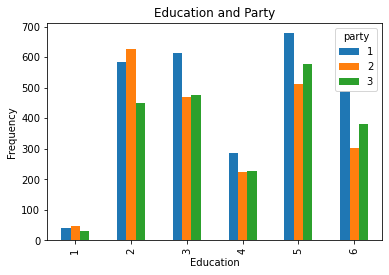

In [789]:
#Generally, as the level of education increases, the percentage of Republicans decreases and the percentage of Democrats increases
pd.crosstab(voter.education,voter.party).plot(kind='bar')
plt.title('Education and Party')
plt.xlabel('Education')
plt.ylabel('Frequency')

count = voter.groupby(['education', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/9.png',  bbox_inches='tight')


#Education: 1 --> No HS, 2 --> High school graduate, 3 --> Some college, 4 --> 2-year, 5 --> 4-year, 6 --> Post-grad
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

age_group  party
1          1          90
           2          31
           3          45
2          1         256
           2         119
           3         157
3          1         368
           2         286
           3         307
4          1        1156
           2         992
           3         991
5          1         821
           2         754
           3         642
dtype: int64
age_group  party
1          1        54.216867
           2        18.674699
           3        27.108434
2          1        48.120301
           2        22.368421
           3        29.511278
3          1        38.293444
           2        29.760666
           3        31.945890
4          1        36.827015
           2        31.602421
           3        31.570564
5          1        37.032025
           2        34.009923
           3        28.958051
dtype: float64


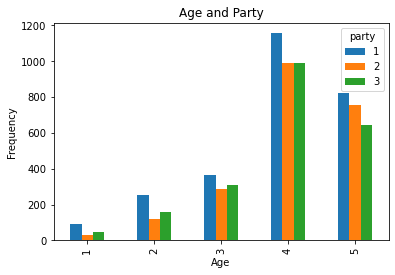

In [790]:
#Generally, the percentage of Democrats in a certain age group decreases as age increases, the opposite is true for Rebublicans. Independent no pattern.
pd.crosstab(voter.age_group,voter.party).plot(kind='bar')
plt.title('Age and Party')
plt.xlabel('Age')
plt.ylabel('Frequency')

count = voter.groupby(['age_group', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/10.png',  bbox_inches='tight')


#Age group: 1 --> 18-29, 2 --> 30-39, 3 --> 40-49, 4 --> 50-64, 5 --> 65+
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

immigration_importance  party
1.0                     1         914
                        2        1380
                        3        1021
2.0                     1        1180
                        2         630
                        3         786
3.0                     1         470
                        2         114
                        3         249
4.0                     1          80
                        2          31
                        3          55
dtype: int64
immigration_importance  party
1.0                     1        27.571644
                        2        41.628959
                        3        30.799397
2.0                     1        45.454545
                        2        24.268105
                        3        30.277350
3.0                     1        56.422569
                        2        13.685474
                        3        29.891957
4.0                     1        48.192771
                        2        18.67469

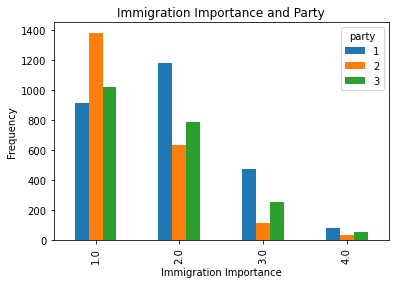

In [791]:
#Generally, Republicans believe immigration is an important topic. Democrats believe it has less of an importance. Independent no pattern.

pd.crosstab(voter.immigration_importance,voter.party).plot(kind='bar')
plt.title('Immigration Importance and Party')
plt.xlabel('Immigration Importance')
plt.ylabel('Frequency')

count = voter.groupby(['immigration_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/11.png',  bbox_inches='tight')

#Immigration Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

environment_importance  party
1.0                     1        1880
                        2         351
                        3         850
2.0                     1         643
                        2         893
                        3         763
3.0                     1          88
                        2         600
                        3         343
4.0                     1          27
                        2         302
                        3         157
dtype: int64
environment_importance  party
1.0                     1        61.019150
                        2        11.392405
                        3        27.588445
2.0                     1        27.968682
                        2        38.842975
                        3        33.188343
3.0                     1         8.535403
                        2        58.195926
                        3        33.268671
4.0                     1         5.555556
                        2        62.13991

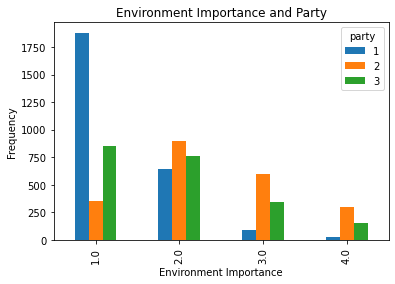

In [792]:
#Generally, Democrats believe the environment is important. Republicans believe it has less of an importance. Independent no pattern.
pd.crosstab(voter.environment_importance,voter.party).plot(kind='bar')
plt.title('Environment Importance and Party')
plt.xlabel('Environment Importance')
plt.ylabel('Frequency')

count = voter.groupby(['environment_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/12.png',  bbox_inches='tight')


#Environment Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

gay_rights_importance  party
1.0                    1        1189
                       2         123
                       3         430
2.0                    1         829
                       2         398
                       3         607
3.0                    1         396
                       2         732
                       3         537
4.0                    1         224
                       2         895
                       3         545
dtype: int64
gay_rights_importance  party
1.0                    1        68.254879
                       2         7.060850
                       3        24.684271
2.0                    1        45.201745
                       2        21.701200
                       3        33.097056
3.0                    1        23.783784
                       2        43.963964
                       3        32.252252
4.0                    1        13.461538
                       2        53.786058
                       

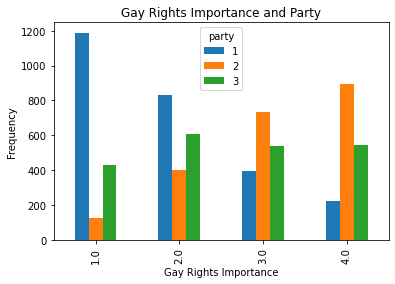

In [793]:
#Generally, Democrats believe gay rights is an important topic. Republicans believe it has less of an importance. Independent no pattern.

pd.crosstab(voter.gay_rights_importance,voter.party).plot(kind='bar')
plt.title('Gay Rights Importance and Party')
plt.xlabel('Gay Rights Importance')
plt.ylabel('Frequency')

count = voter.groupby(['gay_rights_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/13.png',  bbox_inches='tight')

#Gay Rights Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

health_care_importance  party
1.0                     1        2288
                        2        1472
                        3        1562
2.0                     1         335
                        2         582
                        3         496
3.0                     1          12
                        2          78
                        3          44
4.0                     1           8
                        2          22
                        3          14
dtype: int64
health_care_importance  party
1.0                     1        42.991357
                        2        27.658775
                        3        29.349868
2.0                     1        23.708422
                        2        41.188960
                        3        35.102619
3.0                     1         8.955224
                        2        58.208955
                        3        32.835821
4.0                     1        18.181818
                        2        50.00000

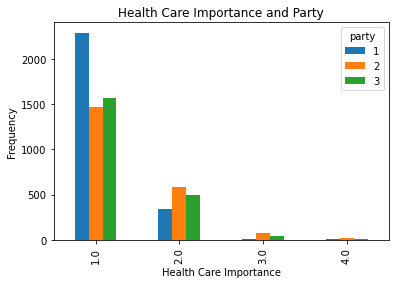

In [794]:
#All parties think health care is important.
pd.crosstab(voter.health_care_importance,voter.party).plot(kind='bar')
plt.title('Health Care Importance and Party')
plt.xlabel('Health Care Importance')
plt.ylabel('Frequency')

count = voter.groupby(['health_care_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/14.png',  bbox_inches='tight')


#Health Care Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

climate_change_importance  party
1.0                        1        1794
                           2         183
                           3         741
2.0                        1         650
                           2         428
                           3         461
3.0                        1         149
                           2         629
                           3         386
4.0                        1          51
                           2         915
                           3         533
dtype: int64
climate_change_importance  party
1.0                        1        66.004415
                           2         6.732892
                           3        27.262693
2.0                        1        42.235218
                           2        27.810266
                           3        29.954516
3.0                        1        12.800687
                           2        54.037801
                           3        33.161512
4.0            

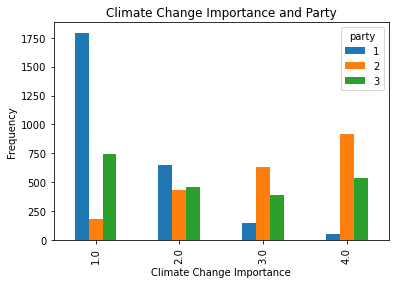

In [795]:
#Generally, Democrats believe climate change is an important topic. Republicans believe it has less of an importance. Independent no pattern.
pd.crosstab(voter.climate_change_importance,voter.party).plot(kind='bar')
plt.title('Climate Change Importance and Party')
plt.xlabel('Climate Change Importance')
plt.ylabel('Frequency')

count = voter.groupby(['climate_change_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/15.png',  bbox_inches='tight')


#Climate Change Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

abortion_importance  party
1.0                  1        1105
                     2         900
                     3         696
2.0                  1         819
                     2         611
                     3         652
3.0                  1         469
                     2         408
                     3         488
4.0                  1         254
                     2         234
                     3         284
dtype: int64
abortion_importance  party
1.0                  1        40.910774
                     2        33.320992
                     3        25.768234
2.0                  1        39.337176
                     2        29.346782
                     3        31.316042
3.0                  1        34.358974
                     2        29.890110
                     3        35.750916
4.0                  1        32.901554
                     2        30.310881
                     3        36.787565
dtype: float64


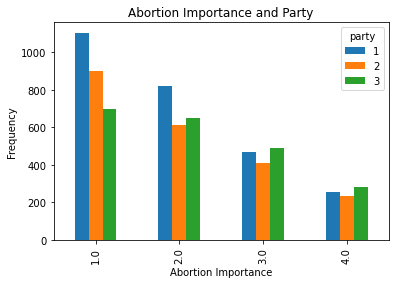

In [796]:
#Both parties have the same view regarding abortion. Independent no pattern.
pd.crosstab(voter.abortion_importance,voter.party).plot(kind='bar')
plt.title('Abortion Importance and Party')
plt.xlabel('Abortion Importance')
plt.ylabel('Frequency')

count = voter.groupby(['abortion_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/16.png',  bbox_inches='tight')


#Abortion Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

racial_equality_importance  party
1.0                         1        1731
                            2         409
                            3         762
2.0                         1         731
                            2         805
                            3         764
3.0                         1         152
                            2         562
                            3         378
4.0                         1          42
                            2         370
                            3         212
dtype: int64
racial_equality_importance  party
1.0                         1        59.648518
                            2        14.093728
                            3        26.257753
2.0                         1        31.782609
                            2        35.000000
                            3        33.217391
3.0                         1        13.919414
                            2        51.465201
                            3        34

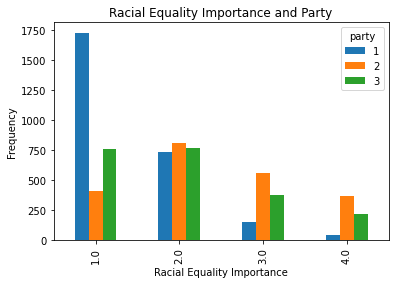

In [797]:
#Generally, Democrats believe racial equality is an important topic. Republicans believe it has less of an importance. Independent no pattern.
pd.crosstab(voter.racial_equality_importance,voter.party).plot(kind='bar')
plt.title('Racial Equality Importance and Party')
plt.xlabel('Racial Equality Importance')
plt.ylabel('Frequency')

count = voter.groupby(['racial_equality_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/17.png',  bbox_inches='tight')


#Racial Equality: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

gender_equality_importance  party
1.0                         1        1626
                            2         277
                            3         613
2.0                         1         755
                            2         641
                            3         699
3.0                         1         193
                            2         639
                            3         458
4.0                         1          74
                            2         582
                            3         352
dtype: int64
gender_equality_importance  party
1.0                         1        64.626391
                            2        11.009539
                            3        24.364070
2.0                         1        36.038186
                            2        30.596659
                            3        33.365155
3.0                         1        14.961240
                            2        49.534884
                            3        35

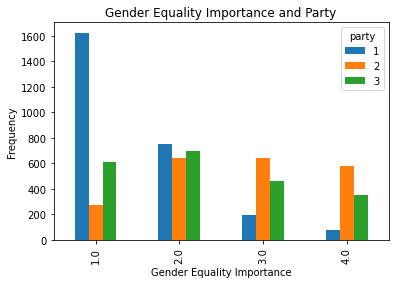

In [798]:
#Generally, Democrats believe gender equality is an important topic. Republicans believe it has less of an importance. Independent no pattern.
pd.crosstab(voter.gender_equality_importance,voter.party).plot(kind='bar')
plt.title('Gender Equality Importance and Party')
plt.xlabel('Gender Equality Importance')
plt.ylabel('Frequency')

count = voter.groupby(['gender_equality_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/18.png',  bbox_inches='tight')

#Gender Equality Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

legality_abortion  party
1.0                1        1553
                   2         241
                   3         674
2.0                1         914
                   2        1345
                   3        1136
3.0                1         138
                   2         501
                   3         240
8.0                1          82
                   2          92
                   3          86
dtype: int64
legality_abortion  party
1.0                1        62.925446
                   2         9.764992
                   3        27.309562
2.0                1        26.921944
                   2        39.617084
                   3        33.460972
3.0                1        15.699659
                   2        56.996587
                   3        27.303754
8.0                1        31.538462
                   2        35.384615
                   3        33.076923
dtype: float64


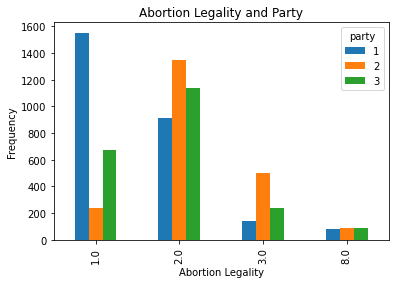

In [799]:
#Generally, Democrats lean towards the legal side, Republicans towards the illegal. Independent no pattern.
pd.crosstab(voter.legality_abortion,voter.party).plot(kind='bar')
plt.title('Abortion Legality and Party')
plt.xlabel('Abortion Legality')
plt.ylabel('Frequency')

count = voter.groupby(['legality_abortion', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/19.png',  bbox_inches='tight')

#Abortion Legality: 1 --> Legal in all cases, 2 --> Legal/Illegal in some, 3 --> Illegal in all cases, 8 --> Don't know
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

gay_marriage  party
1.0           1        2062
              2         501
              3        1155
2.0           1         432
              2        1335
              3         721
8.0           1         192
              2         342
              3         263
dtype: int64
gay_marriage  party
1.0           1        55.459925
              2        13.474987
              3        31.065089
2.0           1        17.363344
              2        53.657556
              3        28.979100
8.0           1        24.090339
              2        42.910916
              3        32.998745
dtype: float64


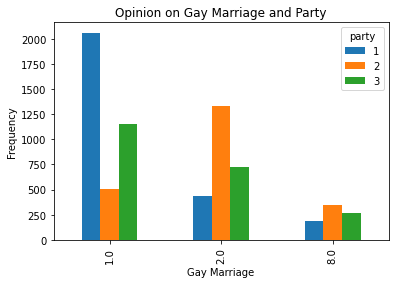

In [800]:
#Generally, Democrats favor gay marriage, Republicans oppose gay marriage. Independent no pattern.
pd.crosstab(voter.gay_marriage,voter.party).plot(kind='bar')
plt.title('Opinion on Gay Marriage and Party')
plt.xlabel('Gay Marriage')
plt.ylabel('Frequency')

count = voter.groupby(['gay_marriage', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/20.png',  bbox_inches='tight')

#Opinion on Gay Marriage: 1 --> Favor, 2 --> Oppose, 8 --> Don't know
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

police_racial_bias  party
1.0                 1         567
                    2        1811
                    3        1170
2.0                 1        1871
                    2         196
                    3         770
8.0                 1         241
                    2         169
                    3         197
dtype: int64
police_racial_bias  party
1.0                 1        15.980834
                    2        51.042841
                    3        32.976325
2.0                 1        65.949947
                    2         6.908706
                    3        27.141346
8.0                 1        39.703460
                    2        27.841845
                    3        32.454695
dtype: float64


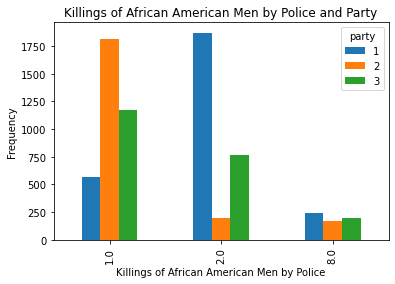

In [801]:
#Generally, Republicans believe that the killings of African American men by police is isolated incidents , Democrats believe it's a part of a broader pattern. Independent no pattern.
pd.crosstab(voter.police_racial_bias,voter.party).plot(kind='bar')
plt.title('Killings of African American Men by Police and Party')
plt.xlabel('Killings of African American Men by Police')
plt.ylabel('Frequency')

count = voter.groupby(['police_racial_bias', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/21.png',  bbox_inches='tight')

#Killings of African American Men by Police: 1 --> Isolated incidents, 2 --> Part of a broader pattern, 8 --> Don't know
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

global_warming  party
1.0             1        2070
                2         247
                3         881
2.0             1         404
                2         582
                3         459
3.0             1          69
                2         622
                3         331
4.0             1          45
                2         603
                3         334
5.0             1          98
                2         128
                3         134
dtype: int64
global_warming  party
1.0             1        64.727955
                2         7.723577
                3        27.548468
2.0             1        27.958478
                2        40.276817
                3        31.764706
3.0             1         6.751468
                2        60.861057
                3        32.387476
4.0             1         4.582485
                2        61.405295
                3        34.012220
5.0             1        27.222222
                2        35.555556
   

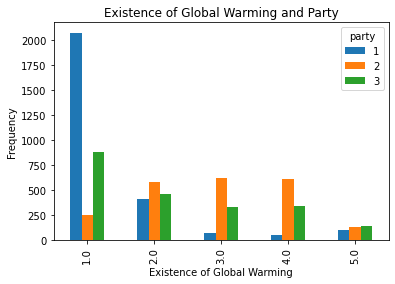

In [802]:
#Generally, Republicans believe that global warming is not happening , Democrats believe it's happening. Independent no pattern.
pd.crosstab(voter.global_warming,voter.party).plot(kind='bar')
plt.title('Existence of Global Warming and Party')
plt.xlabel('Existence of Global Warming')
plt.ylabel('Frequency')

count = voter.groupby(['global_warming', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/22.png',  bbox_inches='tight')


#Global Warming: 1 --> Definitely is happening, 2 --> Probably is happening, 3 --> Probably is not happening, 4 --> Definitely is not, 5 --> Don't know 
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

religion_importance  party
1                    1         880
                     2        1168
                     3         791
2                    1         588
                     2         580
                     3         548
3                    1         430
                     2         242
                     3         321
4                    1         793
                     2         192
                     3         482
dtype: int64
religion_importance  party
1                    1        30.996830
                     2        41.141247
                     3        27.861923
2                    1        34.265734
                     2        33.799534
                     3        31.934732
3                    1        43.303122
                     2        24.370594
                     3        32.326284
4                    1        54.055896
                     2        13.087935
                     3        32.856169
dtype: float64


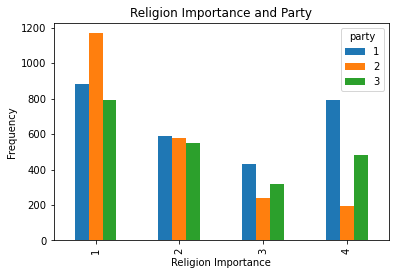

In [803]:
#Generally, Democrats believe religion is less important in their lives. Republicans believe it has more of an importance. Independent no pattern.
pd.crosstab(voter.religion_importance,voter.party).plot(kind='bar')
plt.title('Religion Importance and Party')
plt.xlabel('Religion Importance')
plt.ylabel('Frequency')

count = voter.groupby(['religion_importance', 'party']).size() 
print(count)

percents_df = count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_df)
plt.savefig('./figures/23.png',  bbox_inches='tight')

#Religion Importance: 1 --> Very important, 2 --> Somewhat important, 3 --> Not very important, 4 --> Unimportant
#Party: 1 --> Democrat, 2 --> Republican, 3 --> Independent

In [6]:
log_1 = voter[["party", "race", "gender", "education", "age_group", "immigration_importance", "environment_importance", "gay_rights_importance", "climate_change_importance", "racial_equality_importance", "gender_equality_importance", "legality_abortion", "gay_marriage", "police_racial_bias", "global_warming", "religion_importance"]]

In [804]:
log_1 = log_1.dropna() 
log_1.drop(log_1[log_1['party'] > 2].index, inplace = True) #Independent dropped (no pattern)

x = log_1.drop('party', axis=1)
y = log_1['party']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logmodel = LogisticRegression(max_iter = 200)
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89       777
           2       0.86      0.86      0.86       611

    accuracy                           0.88      1388
   macro avg       0.88      0.88      0.88      1388
weighted avg       0.88      0.88      0.88      1388

[[694  83]
 [ 87 524]]
0.877521613832853


In [780]:
#test to input your own values
d = { "race": [1], "gender": [1], "education": [3], "age_group": [3], "immigration_importance": [1], "environment_importance": [4], "gay_rights_importance": [3], "climate_change_importance": [3], "racial_equality_importance": [3], "gender_equality_importance": [3], "legality_abortion": [2], "gay_marriage": [2], "police_racial_bias": [1], "global_warming": [3], "religion_importance": [2]}
df = pd.DataFrame(data=d)
df

model = RandomForestClassifier(n_estimators = 150, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(df)
print(prediction_test)


[2]


In [764]:
model = RandomForestClassifier(n_estimators = 10, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))

Accuracy =  0.8796829971181557
global_warming               0.514233
climate_change_importance    0.238468
police_racial_bias           0.177157
gay_rights_importance        0.070143
dtype: float64
              precision    recall  f1-score   support

           1       0.89      0.90      0.89       777
           2       0.87      0.86      0.86       611

    accuracy                           0.88      1388
   macro avg       0.88      0.88      0.88      1388
weighted avg       0.88      0.88      0.88      1388

[[697  80]
 [ 87 524]]


In [762]:
log_1 = log_1.dropna() 
log_1.drop(log_1[log_1['party'] > 2].index, inplace = True) #Independent dropped (no pattern)

x = log_1[['climate_change_importance', 'police_racial_bias', 'gay_rights_importance', 'global_warming']]
y = log_1['party']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logmodel = LogisticRegression(max_iter = 200)
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.89      0.88       777
           2       0.85      0.85      0.85       611

    accuracy                           0.87      1388
   macro avg       0.87      0.87      0.87      1388
weighted avg       0.87      0.87      0.87      1388

[[688  89]
 [ 90 521]]
0.8710374639769453


In [763]:
model = RandomForestClassifier(n_estimators = 10, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))

Accuracy =  0.8796829971181557
global_warming               0.514233
climate_change_importance    0.238468
police_racial_bias           0.177157
gay_rights_importance        0.070143
dtype: float64
              precision    recall  f1-score   support

           1       0.89      0.90      0.89       777
           2       0.87      0.86      0.86       611

    accuracy                           0.88      1388
   macro avg       0.88      0.88      0.88      1388
weighted avg       0.88      0.88      0.88      1388

[[697  80]
 [ 87 524]]


In [20]:
log_2 = voter[["ideology", "president_voted_for", "party", "gender", "education", "age_group", "immigration_importance", "environment_importance", "gay_rights_importance", "climate_change_importance", "racial_equality_importance", "gender_equality_importance", "legality_abortion", "gay_marriage", "police_racial_bias", "global_warming", "religion_importance"]]

In [21]:
log_2 = log_2.dropna() 

x = log_2.drop(['party', 'president_voted_for', 'ideology'],  axis=1)
y = log_2['party']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)
logmodel = LogisticRegression(max_iter = 300)
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.84      0.74       736
           2       0.61      0.72      0.66       590
           3       0.39      0.18      0.25       585

    accuracy                           0.60      1911
   macro avg       0.55      0.58      0.55      1911
weighted avg       0.56      0.60      0.56      1911

[[620  48  68]
 [ 69 424  97]
 [253 225 107]]
0.6023024594453166


In [22]:
model = RandomForestClassifier(n_estimators = 700, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))

Accuracy =  0.5928833071690215
education                     0.107254
global_warming                0.105555
climate_change_importance     0.084856
age_group                     0.084355
religion_importance           0.077981
police_racial_bias            0.071206
gay_rights_importance         0.069475
gender_equality_importance    0.064707
racial_equality_importance    0.063285
legality_abortion             0.062583
environment_importance        0.061316
immigration_importance        0.061127
gay_marriage                  0.051416
gender                        0.034882
dtype: float64
              precision    recall  f1-score   support

           1       0.66      0.77      0.71       736
           2       0.60      0.74      0.66       590
           3       0.39      0.22      0.28       585

    accuracy                           0.59      1911
   macro avg       0.55      0.58      0.55      1911
weighted avg       0.56      0.59      0.56      1911

[[569  62 105]
 [ 63 437  9

In [703]:
x = log_2.drop(['party', 'president_voted_for'],  axis=1)
y = log_2['party']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logmodel = LogisticRegression(max_iter = 300)
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.80      0.72       686
           2       0.64      0.70      0.67       626
           3       0.44      0.29      0.35       599

    accuracy                           0.61      1911
   macro avg       0.58      0.60      0.58      1911
weighted avg       0.58      0.61      0.59      1911

[[551  40  95]
 [ 64 436 126]
 [223 203 173]]
0.6070120355834642


In [715]:
model = RandomForestClassifier(n_estimators = 951, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))

Accuracy =  0.6509680795395081
ideology                      0.113828
education                     0.093087
global_warming                0.091109
climate_change_importance     0.084449
age_group                     0.072682
religion_importance           0.068217
police_racial_bias            0.062831
gay_rights_importance         0.060839
gender_equality_importance    0.057280
racial_equality_importance    0.055772
immigration_importance        0.055175
legality_abortion             0.054640
environment_importance        0.054324
gay_marriage                  0.044017
gender                        0.031750
dtype: float64
              precision    recall  f1-score   support

           1       0.68      0.80      0.73       686
           2       0.69      0.79      0.74       626
           3       0.51      0.34      0.41       599

    accuracy                           0.65      1911
   macro avg       0.63      0.64      0.63      1911
weighted avg       0.63      0.65      0.63

In [26]:
x = log_2.drop(['party'],  axis=1)
y = log_2['party']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logmodel = LogisticRegression(max_iter = 300)
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.70      0.89      0.78       686
           2       0.67      0.85      0.75       626
           3       0.54      0.22      0.31       599

    accuracy                           0.67      1911
   macro avg       0.64      0.65      0.61      1911
weighted avg       0.64      0.67      0.62      1911

[[610  33  43]
 [ 25 533  68]
 [238 230 131]]
0.6666666666666666


In [27]:
model = RandomForestClassifier(n_estimators = 1420, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))

Accuracy =  0.6640502354788069
president_voted_for           0.146121
ideology                      0.091939
education                     0.084431
global_warming                0.079003
climate_change_importance     0.067822
age_group                     0.065794
religion_importance           0.062549
gay_rights_importance         0.052151
gender_equality_importance    0.049290
racial_equality_importance    0.049030
immigration_importance        0.048124
environment_importance        0.047709
police_racial_bias            0.046343
legality_abortion             0.046281
gay_marriage                  0.035824
gender                        0.027588
dtype: float64
              precision    recall  f1-score   support

           1       0.70      0.84      0.76       686
           2       0.71      0.81      0.75       626
           3       0.51      0.32      0.39       599

    accuracy                           0.66      1911
   macro avg       0.64      0.65      0.63      1911
weig

In [8]:
log_pres = voter[["party", "president_voted_for", "gender"]]

In [29]:
log_pres = log_pres.dropna() 
log_pres.drop(log_pres[log_pres['party'] > 2].index, inplace = True)  

x = log_pres[['party', "gender"]]
y = log_pres['president_voted_for']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)
logmodel = LogisticRegression(max_iter = 200)
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       745
         2.0       0.95      0.91      0.93       652

    accuracy                           0.93      1397
   macro avg       0.93      0.93      0.93      1397
weighted avg       0.93      0.93      0.93      1397

[[712  33]
 [ 60 592]]
0.933428775948461


In [30]:
model = RandomForestClassifier(n_estimators = 10, random_state = 20)
model.fit(x_train, y_train)
prediction_test = model.predict(x_test)

print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)
print(classification_report(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))

Accuracy =  0.933428775948461
party     0.997475
gender    0.002525
dtype: float64
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       745
         2.0       0.95      0.91      0.93       652

    accuracy                           0.93      1397
   macro avg       0.93      0.93      0.93      1397
weighted avg       0.93      0.93      0.93      1397

[[712  33]
 [ 60 592]]
